# Geographic data I/O {#read-write}

## Prerequisites

This chapter requires the following packages:


In [34]:
import numpy as np
import fiona
import geopandas as gpd
import shapely
import rasterio

In [35]:
# 出现错误CRSError: Invalid projection: epsg:4326: 的解决方案
# 因为装了多个版本的pyproj
# 在anaconda的目录下搜一下其他的proj.db文件的路径
# 复制路径在所装的环境文件夹下的Library文件夹下的那个路径，使用pyproj.datadir.set_data_dir()来更新目录
import pyproj
# pyproj.datadir.get_data_dir()
path = 'D:\work\miniconda3\Library\share\proj'
pyproj.datadir.set_data_dir(path)

d:\work\miniconda3\envs\topojson\lib\site-packages\pyproj\datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [36]:
#| echo: false
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 6
pd.options.display.max_columns = 6
pd.options.display.max_colwidth = 35
plt.rcParams['figure.figsize'] = (5, 5)

## 介绍

本章介绍地理数据的读写。
地理数据导入对于地理计算至关重要：没有数据，现实世界的应用程序就不可能实现。
数据输出也至关重要，使其他人能够使用您工作中产生的有价值的新数据集或改进的数据集。
总的来说，这些导入/输出过程可以称为数据I/O。

地理数据 I/O 通常在项目开始和结束时只需几行代码即可完成。
它作为一个简单的一步过程经常被忽视。
然而，在项目开始时犯下的错误（例如使用过时的或以某种方式有缺陷的数据集）可能会导致以后出现大问题，因此值得投入大量时间来确定哪些数据集可用，哪些数据集可用 可以找到它们以及如何检索它们。
@sec-retriving-open-data 涵盖了这些主题，它描述了各种地理门户（总共包含许多 TB 的数据）以及如何使用它们。
为了进一步简化数据访问，已经开发了许多用于下载地理数据的包，如 @sec-geographic-data-packages 中所述。

有许多地理文件格式，每种格式都有优点和缺点，如 @sec-file-formats 中所述。
@sec-data-input 和 @sec-data-output 节分别介绍了高效读取和写入格式文件的过程。
最后一节 @sec-visual-outputs 演示了保存视觉输出（地图）的方法，为可视化上的 @sec-map-making 做准备。

## 检索开放数据 {#sec-retriving-open-data}

## 地理数据包 {#sec-geographic-data-packages}

## 地理网络服务

## 文件格式 {#sec-file-formats}

地理数据集通常存储为文件或空间数据库。
文件格式可以存储矢量或栅格数据，而空间数据库（例如 [PostGIS](https://postgis.net/)）可以存储这两种数据。
种类繁多的文件格式可能看起来令人困惑，但自 20 世纪 60 年代 GIS 软件问世以来，第一个广泛分发的程序 ([SYMAP](https://news.harvard.edu/gazette/ 哈佛大学创建了用于空间分析的story/2011/10/the-invention-of-gis/)) [@coppock_history_1991]。

GDAL（应发音为“goo-dal”，双“o”表示面向对象），地理空间数据抽象库，自 2000 年发布以来已经解决了与地理文件格式之间不兼容相关的许多问题。
GDAL 提供了一个统一的高性能接口，用于读写多种栅格和矢量数据格式。
许多开放和专有的 GIS 程序，包括 GRASS、ArcGIS 和 QGIS，都在其 GUI 后面使用 GDAL 来以适当的格式进行摄取和吐出地理数据的工作。

GDAL 提供对 200 多种矢量和栅格数据格式的访问。
@tbl-file-formats 提供有关选定且常用的空间文件格式的一些基本信息。

名称 | 扩展| 信息 | 类型 | 型号|
|-----|----|----------|-----|-----|
ESRI 形状文件 | `.shp`（主文件）| 流行的格式至少包含三个文件。 不支持：文件 > 2GB；混合类型； 名称 > 10 个字符； 列 > 255。 矢量| 部分开放 |
GeoJSON | `.geojson` | 通过包含简单特征表示的子集来扩展 JSON 交换格式； 主要用于存储经度和纬度坐标； 它由 TopoJSON 格式扩展 | 矢量| 打开|
KML | `.kml` | 基于 XML 的空间可视化格式，专为与 Google Earth 一起使用而开发。 压缩的 KML 文件形成 KMZ 格式。 | 矢量| 打开|
GPX | `.gpx` | 为交换 GPS 数据而创建的 XML 架构。 | 矢量| 打开|
FlatGeobuf | `.fgb` | 单一文件格式允许快速读取和写入矢量数据。 具有流媒体功能。 | 矢量| 打开|
GeoTIFF | `.tif/.tiff` | 流行的光栅格式。 包含附加空间元数据的 TIFF 文件。 | 光栅| 打开|
弧形 ASCII | `.asc` | 文本格式，其中前六行表示栅格标题，后面是按行和列排列的栅格像元值。 | 光栅| 打开|
SQLite/SpatiaLite | `.sqlite` | 独立的关系数据库 SpatiaLite 是 SQLite 的空间扩展。 | 矢量和光栅| 打开|
ESRI 文件GDB | `.gdb` | ArcGIS 创建的空间和非空间对象。 允许：多个要素类； 拓扑。 GDAL 的支持有限。 | 矢量和光栅| 专有|
地理包| `.gpkg` | 基于 SQLite 的轻量级数据库容器允许轻松且独立于平台的地理数据交换 | 矢量和（非常有限）光栅| 打开|
：常用的空间数据文件格式{#tbl-file-formats}

确保文件格式标准化和开源的一项重要发展是 1994 年开放地理空间联盟 ([OGC](http://www.opengeospatial.org/)) 的成立。
除了定义简单要素数据模型（请参阅@sec-simple-features）之外，OGC 还协调开放标准的开发，例如 KML 和 GeoPackage 等文件格式中使用的标准。
OGC 认可的开放文件格式与专有格式相比有几个优点：标准已发布，确保透明度并为用户提供了根据其特定需求进一步开发和调整文件格式的可能性。

ESRI Shapefile 是最流行的矢量数据交换格式； 然而，它不是一种开放格式（尽管其规范是开放的）。
它于 20 世纪 90 年代初开发，有许多局限性。
首先，它是一种多文件格式，至少由三个文件组成。
它仅支持 255 列，列名称限制为 10 个字符，文件大小限制为 2 GB。
此外，ESRI Shapefile 不支持所有可能的几何类型，例如，它无法区分多边形和多边形。
尽管存在这些限制，但长期以来一直缺乏可行的替代方案。
与此同时，[GeoPackage](https://www.geopackage.org/) 出现了，并且似乎是 ESRI Shapefile 的更合适的替代候选者。
GeoPackage 是一种用于交换地理空间信息的格式和 OGC 标准。
GeoPackage 标准描述了如何在小型 SQLite 容器中存储地理空间信息的规则。
因此，GeoPackage 是一个轻量级的空间数据库容器，它允许存储矢量和栅格数据，也允许存储非空间数据和扩展。
除了 GeoPackage 之外，还有其他值得一试的地理空间数据交换格式（@tbl-file-formats）。

GeoTIFF 格式似乎是最著名的栅格数据格式。
它允许将空间信息（例如 CRS 定义和变换矩阵（请参阅@sec-using-rasterio））嵌入到 TIFF 文件中。
与 ESRI Shapefile 类似，该格式最初于 20 世纪 90 年代开发，但作为一种开放格式。
此外，GeoTIFF 仍在扩展和改进中。
GeoTIFF 格式最近最重要的新增内容之一是其名为 COG（云优化 GeoTIFF）的变体。
保存为 COG 的栅格对象可以托管在 HTTP 服务器上，因此其他人只能读取文件的部分内容，而无需下载整个文件（请参阅第 8.6.2 节和第 8.7.2 节...）。

由于书籍限制，还有大量其他空间数据格式，我们没有在 @tbl-file-formats 中详细解释或提及。
如果您需要使用其他格式，我们鼓励您阅读有关 [矢量](https://gdal.org/drivers/vector/index.html) 和 [光栅](https://gdal.org/) 的 GDAL 文档 drivers/raster/index.html) 驱动程序。
此外，某些空间数据格式可以存储矢量或栅格以外的其他数据模型（类型）。
它包括用于存储激光雷达点云的 LAS 和 LAZ 格式，以及用于存储多维数组的 NetCDF 和 HDF。

最后，空间数据通常还使用表格（非空间）文本格式存储，包括 CSV 文件或 Excel 电子表格。
这可以方便地与那些对空间数据格式有困难的人或软件共享空间数据集。

## 数据输入 (I) 

执行“geopandas.read_file”（我们用于加载矢量数据的主函数）或“rasterio.open”+“.read”（用于加载栅格数据的主函数）等命令会默默地引发一系列读取事件 来自文件的数据。
此外，有许多 Python 包包含广泛的地理数据或提供对不同数据源的简单访问。
所有这些都将数据加载到 Python 环境中，或者更准确地说，将对象分配到工作区，存储在 RAM 中并在 Python 会话中访问。

### 矢量数据

空间矢量数据有多种文件格式。
最流行的表示形式，如“.shp”、“.geojson”和“.gpkg”文件可以使用“geopandas”函数“read_file”和“to_file”导入和导出（在 \@ref(sec-data- 输出）），分别。

`geopandas` 使用 GDAL 通过 `fiona` （[默认](https://github.com/geopandas/geopandas/issues/2217)）或 `pyogrio` 包（最近开发的替代方案 `fiona`）来读取和写入数据 菲奥娜`）。
导入“fiona”后，可以使用命令“fiona.supported_drivers”列出 GDAL 可用的驱动程序，包括它们是否可以（“r”）、附加（“a”）或写入（“w”）数据， 或全部三个：

In [37]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r',
 'KML': 'r'}

其他不太常见的驱动程序可以通过手动补充“fiona.supported_drivers”来[“激活”](https://geopandas.org/en/stable/docs/user_guide/io.html)。
“geopandas”多功能数据导入函数“gpd.read_file”的第一个参数是“filename”，它通常是一个字符串，但也可以是一个文件连接。
字符串的内容可能因不同的驱动程序而异。
在大多数情况下，与 ESRI Shapefile (`.shp`) 或 GeoPackage 格式 (`.gpkg`) 一样，`filename` 参数将是实际文件的路径或 URL，例如 `geodata.gpkg` 。
根据文件扩展名自动选择驱动程序，如下面的“.gpkg”文件所示：


In [38]:
world = gpd.read_file('data/world.gpkg')
world

,iso_a2,name_long,continent,...,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,...,69.960000,8222.253784,MULTIPOLYGON (((-180.00000 -16....
1,TZ,Tanzania,Africa,...,64.163000,2402.099404,MULTIPOLYGON (((33.90371 -0.950...
2,EH,Western Sahara,Africa,...,NaN,NaN,MULTIPOLYGON (((-8.66559 27.656...
...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,...,71.097561,8698.291559,MULTIPOLYGON (((20.59025 41.855...
175,TT,Trinidad and Tobago,North America,...,70.426000,31181.821196,MULTIPOLYGON (((-61.68000 10.76...
176,SS,South Sudan,Africa,...,55.817000,1935.879400,MULTIPOLYGON (((30.83385 3.5091...


对于某些驱动程序，例如文件地理数据库（“OpenFileGDB”），“文件名”可以作为文件夹名称提供。
GeoJSON 字符串也可以从字符串中读取：


In [39]:
gpd.read_file('{"type":"Point","coordinates":[34.838848,31.296301]}')

,geometry
0,POINT (34.83885 31.29630)


或者，可以使用“gpd.read_postgis”函数从 PostGIS 数据库读取矢量图层。

某些矢量格式（例如 GeoPackage）可以存储多个数据层。
默认情况下，`gpd.read_file`自动读取`filename`中指定的文件的第一层。
但是，使用“layer”参数您可以指定任何其他层。

`gpd.read_file` 函数还允许通过两种可能的机制将文件的一部分读入 RAM。
第一个与“where”参数相关，它允许使用 SQL“WHERE”表达式指定要读取数据的哪一部分。
下面的示例仅提取坦桑尼亚的数据（图...）。
这是通过指定我们想要获取 `name_long` 等于 `"Tanzania"` 的所有行来完成的：


In [40]:
tanzania = gpd.read_file('data/world.gpkg', where='name_long="Tanzania"')
tanzania

,iso_a2,name_long,continent,...,lifeExp,gdpPercap,geometry
0,TZ,Tanzania,Africa,...,64.163,2402.099404,MULTIPOLYGON (((33.90371 -0.950...


如果您不知道可用列的名称，一个好的方法是使用“rows”参数仅读取一行数据，该参数可用于读取前 N 行，然后使用“.columns”属性 检查列名：


In [41]:
gpd.read_file('data/world.gpkg', rows=1).columns

Index(['iso_a2', 'name_long', 'continent', 'region_un', 'subregion', 'type',
       'area_km2', 'pop', 'lifeExp', 'gdpPercap', 'geometry'],
      dtype='object')

第二种机制使用“mask”参数根据与现有几何图形的交集来过滤数据。
该参数需要一个几何图形（“GeoDataFrame”、“GeoSeries”或“shapely”）来表示我们要提取数据的区域。
让我们用一个小例子来尝试一下——我们想要从文件中读取与坦桑尼亚边界 50,000 $m$ 缓冲区相交的多边形。
为此，我们需要 (a) 将几何图形转换为投影的 CRS（例如 EPSG:32736），(b) 通过创建缓冲区 (@sec-buffers) 准备我们的“过滤器”，以及 (c) 转换回来 到原始 CRS 用作掩码：


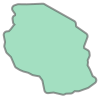

In [42]:
tanzania_buf = tanzania.to_crs(32736).buffer(50000).to_crs(4326)
tanzania_buf.iloc[0]

现在，我们可以使用“mask”参数来应用这个“过滤器”。


In [43]:
tanzania_neigh = gpd.read_file('data/world.gpkg', mask=tanzania_buf)
tanzania_neigh

,iso_a2,name_long,continent,...,lifeExp,gdpPercap,geometry
0,MZ,Mozambique,Africa,...,57.099,1079.823866,MULTIPOLYGON (((34.55999 -11.52...
1,ZM,Zambia,Africa,...,60.775,3632.503753,MULTIPOLYGON (((30.74001 -8.340...
2,MW,Malawi,Africa,...,61.932,1090.367208,MULTIPOLYGON (((32.75938 -9.230...
...,...,...,...,...,...,...,...
6,BI,Burundi,Africa,...,56.688,803.172837,MULTIPOLYGON (((30.46967 -2.413...
7,UG,Uganda,Africa,...,59.224,1637.275081,MULTIPOLYGON (((33.90371 -0.950...
8,RW,Rwanda,Africa,...,66.188,1629.868866,MULTIPOLYGON (((30.41910 -1.134...


@fig-read-shp-query 中显示的结果包含坦桑尼亚及其 50,000 $m$ 缓冲区内的每个国家/地区。
请注意，最后两个表达式用于添加带有每个国家/地区的“name_long”的文本标签，放置在国家/地区质心处：


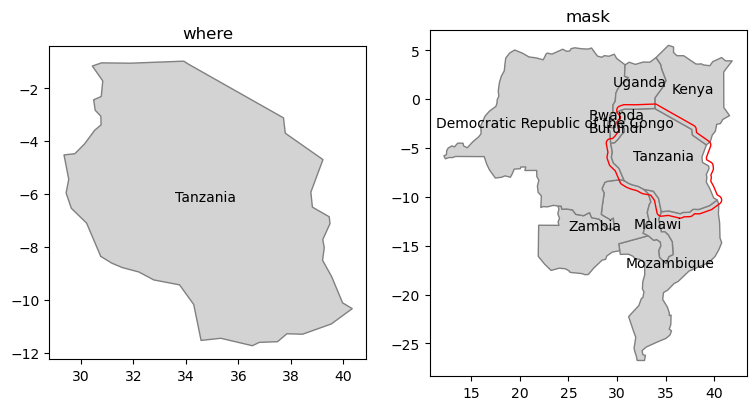

In [44]:
#| label: fig-read-shp-query
#| fig-cap: Reading a subset of the vector data using a `where` query (left) and a `mask` (right)

fig, axes = plt.subplots(ncols=2, figsize=(9,5))
tanzania.plot(ax=axes[0], color='lightgrey', edgecolor='grey')
tanzania_neigh.plot(ax=axes[1], color='lightgrey', edgecolor='grey')
tanzania_buf.plot(ax=axes[1], color='none', edgecolor='red')
axes[0].set_title('where')
axes[1].set_title('mask')
tanzania.apply(lambda x: axes[0].annotate(text=x['name_long'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
tanzania_neigh.apply(lambda x: axes[1].annotate(text=x['name_long'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

通常我们需要读取具有 x 和 y 坐标列的 CSV 文件（或其他表格格式），并将它们转换为具有点几何形状的“GeoDataFrame”。
为此，我们可以使用“pandas”（例如“pd.read_csv”或“pd.read_excel”）导入文件，然后使用“gpd.points_from_xy”函数从“DataFrame”转到“GeoDataFrame”，如图所示 本书前面的内容（请参阅@sec-vector-layer-from-scratch 和 @sec-spatial-joining）。
例如，表“cycle_hire_xy.csv”，其中坐标存储在 EPSG:4326 的“X”和“Y”列中，可以导入、转换为“GeoDataFrame”并绘制，如下所示：


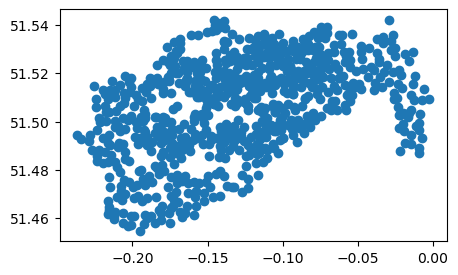

In [45]:
cycle_hire = pd.read_csv('data/cycle_hire_xy.csv')
geom = gpd.points_from_xy(cycle_hire['X'], cycle_hire['Y'], crs=4326)
geom = gpd.GeoSeries(geom)
cycle_hire_xy = gpd.GeoDataFrame(data=cycle_hire, geometry=geom)
cycle_hire_xy.plot();

单个列也可以包含几何信息，而不是描述“XY”坐标的列。
众所周知的文本 (WKT)、众所周知的二进制 (WKB) 和 GeoJSON 格式就是这样的示例。
例如，“world_wkt.csv”文件有一个名为 WKT 的列，表示世界各国的多边形。
要将其导入并转换为“GeoDataFrame”，我们可以在 WKT 字符串上应用“shapely.wkt.loads”函数（@sec-geometries），将它们转换为“shapely”几何图形：


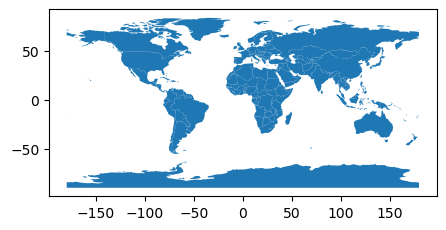

In [46]:
world_wkt = pd.read_csv('data/world_wkt.csv')
world_wkt['geometry'] = world_wkt['WKT'].apply(shapely.wkt.loads)
world_wkt = gpd.GeoDataFrame(world_wkt)
world_wkt.plot();

::: {.callout-note}
并非所有受支持的矢量文件格式都存储有关其坐标参考系统的信息。 在这些情况下，可以使用“.set_crs”函数添加缺少的信息。 另请参阅@sec-querying-and-setting-coordinate-systems 了解更多信息。
:::

作为最后一个示例，我们将展示“geopandas”如何读取 KML 文件。
KML 文件以 XML 格式存储地理信息——一种用于以独立于应用程序的方式创建网页和传输数据的数据格式（Nolan 和 Lang 2014 ...）。 在这里，我们从网络访问 KML 文件。 首先，我们需要“激活”“KML”驱动程序，默认情况下该驱动程序不可用（见上文）：


In [47]:
fiona.supported_drivers['KML'] = 'r'

该文件包含多个层。 要列出可用层，我们可以使用“fiona.listlayers”函数：


### 栅格数据

与矢量数据类似，栅格数据有多种文件格式，其中一些支持多层文件。
`rasterio.open` 用于创建到光栅文件的文件连接，随后可用于读取元数据和/或值，如前面所示 (@sec-using-rasterio)。
例如：


In [48]:
src = rasterio.open('data/srtm.tif')
src

<open DatasetReader name='data/srtm.tif' mode='r'>

前面的所有示例都从硬盘驱动器上存储的文件中读取空间信息。
但是，GDAL 还允许直接从在线资源读取数据，例如 HTTP/HTTPS/FTP Web 资源。
我们唯一需要做的就是在文件路径之前添加“/vsicurl/”前缀。
让我们尝试连接 2000-2012 年期间分辨率为 500 m 的全球月降雪概率（T. Hengl 2021 添加参考...）。
12 月的降雪概率存储为云优化 GeoTIFF (COG) 文件（请参阅@sec-file-formats）。
要读取在线文件，我们只需提供其 URL 以及“/vsicurl/”前缀：


In [49]:
url = "/vsicurl/https://zenodo.org/record/5774954/files/clm_snow.prob_esacci.dec_p.90_500m_s0..0cm_2000..2012_v2.0.tif"
src = rasterio.open(url)
src

<open DatasetReader name='/vsicurl/https://zenodo.org/record/5774954/files/clm_snow.prob_esacci.dec_p.90_500m_s0..0cm_2000..2012_v2.0.tif' mode='r'>

在上面的示例中，“rasterio.open”创建了与文件的连接，但没有获取任何值，就像我们对本地“srtm.tif”文件所做的那样。
可以使用文件连接（@sec-using-rasterio）的“.read”方法将这些值读入“ndarray”。
这允许我们只读取一小部分数据，而无需下载整个文件。
当处理从资源受限的计算环境（例如笔记本电脑）在线托管的大型数据集时，这非常有用。

另一种选择是使用“.sample”方法直接从文件连接中提取特定点的栅格值（请参阅@sec-spatial-subsetting）。
例如，我们可以通过指定坐标并应用 `.sample` 来获取雷克雅未克 12 月的下雪概率 (70%)：


In [50]:
values = src.sample([(-21.94, 64.15)])
list(values)

[array([70], dtype=uint8)]

上面的示例有效地提取和下载单个值而不是整个 GeoTIFF 文件，从而节省了宝贵的资源。
`/vsicurl/` 前缀**也适用于矢量文件格式**，使您只需将其添加到矢量文件 URL 之前即可使用 `geopandas` 从在线存储导入数据集。

重要的是，“/vsicurl/”并不是 GDAL 提供的唯一前缀——还有更多前缀，例如“/vsizip/”用于从 ZIP 存档中读取空间文件而不预先解压缩它们，或者“/vsis3/”用于直接读取空间文件。 -fly 读取 AWS S3 存储桶中可用的文件。 您可以在<https://gdal.org/user/virtual_file_systems.html>了解更多信息。

（添加读取矩形范围的示例...）

## 数据输出 (O) {#sec-data-output}

写入地理数据允许您从一种格式转换为另一种格式，并保存新创建的对象以进行永久存储。
根据数据类型（矢量或栅格）、对象类（例如“GeoDataFrame”）以及存储信息的类型和数量（例如对象大小、值范围），了解如何将空间文件存储在 最有效的方法。
接下来的两节将演示如何做到这一点。

### 矢量数据

与 gpd.read_file 相对应的是 GeoDataFrame 具有的 .to_file 方法。 它允许您将“GeoDataFrame”对象写入各种地理矢量文件格式，包括最常见的“.geojson”、“.shp”和“.gpkg”。 根据文件名，“.to_file”自动决定使用哪个驱动程序。 写入过程的速度还取决于驱动程序。


In [51]:
world.to_file('output/world.gpkg')

注意：如果您尝试再次写入同一数据源，该函数将覆盖该文件：


In [52]:
world.to_file('output/world.gpkg')

我们可以使用“mode='a'”（“追加”模式，而不是“写入”模式的默认“mode='w”）向文件添加一个新层，而不是覆盖文件。 多种空间格式支持追加，包括 GeoPackage。 例如：

In [53]:
world.to_file('output/world_many_features.gpkg')
world.to_file('output/world_many_features.gpkg', mode='a')

这里，“world_many_features.gpkg”将包含一个名为“world”的多边形层，其中每个国家有两个“副本”（即 177×2=354 个特征，而“world”层有 177 个特征）。

或者，您可以在同一文件中创建另一个单独的图层。 GeoPackage 格式还支持一个文件内的多个层。 例如：


In [54]:
world.to_file('output/world_many_layers.gpkg')
world.to_file('output/world_many_layers.gpkg', layer='world2')

在这种情况下，`world_many_layers.gpkg`有两个“层”，`world_many_layers`（当未指定`layer`时与文件名相同）和`world2`。 顺便说一句，两层的内容是相同的，但不一定如此。 此类文件中的每个层都可以单独导入，如下所示：


In [55]:
gpd.read_file('output/world_many_layers.gpkg', layer='world_many_layers').head(1)

,iso_a2,name_long,continent,...,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,...,69.96,8222.253784,MULTIPOLYGON (((-180.00000 -16....


In [56]:
gpd.read_file('output/world_many_layers.gpkg', layer='world2').head(1)

,iso_a2,name_long,continent,...,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,...,69.96,8222.253784,MULTIPOLYGON (((-180.00000 -16....


### 栅格数据 {#sec-data-output-raster}

要使用**rasterio**写入光栅文件，我们需要以写入（“w”）模式将光栅文件路径传递给“rasterio.open”。 这意味着创建一个新的空文件（或覆盖现有文件）。 与读取（“r”，默认）模式相反，除了文件路径和模式之外，“rasterio.open”函数还需要相当多的信息：

* 包含栅格值的数组
* 描述栅格格式和空间属性的元数据

元数据需要指定以下属性：

* `driver`---文件格式（GeoTIFF推荐使用`'GTiff'`）
* `height`---行数
* `width`---列数
* `count`---波段数
* `nodata`---表示“无数据”的值（如果有）
* `dtype`---栅格数据类型，**numpy**类型之一（例如，`np.int64`）
* `crs`---CRS，使用 EPSG 代码（例如，`4326`）
* `transform`---变换矩阵
* `compress`---要应用的压缩方法，例如`'lzw'`。 这是可选的，对于大型栅格来说最有用。 请注意，在撰写本文时，这[效果不佳](https://gis.stackexchange.com/questions/404738/why-does-rasterio-compression-reduces-image-size-with-single- band-but-not-with-m) 用于编写多波段栅格。

一旦具有正确元数据的文件连接准备就绪，我们就使用文件连接的“.write”方法进行实际写入。 如果有多个带，我们可以多次执行“.write”方法，如“.write(a,n)”，其中“a”是带值的数组，“n”是带索引（从 `1`，见下文）。 完成后，我们使用“.close”方法关闭文件连接。 一些函数，例如用于重采样和重投影的“rasterio.warp.reproject”，直接接受“w”模式下的文件连接，从而为我们处理（重采样或重投影栅格的）写入。

大多数属性要么根据我们的目标直接选择（例如“driver”、“crs”、“compress”、“nodata”），要么直接从具有栅格值本身的数组派生（例如“ 高度`、`宽度`、`计数`、`dtype`)。 最复杂的属性是“变换”，它指定栅格原点和分辨率。 `transform` 通常要么从现有栅格获得（充当“模板”），要么根据手动指定的原点和分辨率值从头开始创建（例如，使用 `rasterio.transform.from_origin`），或者自动计算（ 例如，使用“rasterio.warp.calculate_default_transform”）。

在本书的前面，我们已经演示了编写栅格的四种最常见的场景：

* 从头开始创建（@sec-raster-from-scratch）---我们通过将“elev”和“grain”数组与任意空间范围相关联，从头开始创建并编写两个栅格。 使用“rasterio.transform.from_origin”创建的自定义任意“transform”。
* 聚合（@sec-raster-agg-disagg）——我们通过从现有栅格读取重采样数组，然后使用“.transform.scale”更新“transform”，编写了一个聚合栅格。
* 重新采样（@sec-raster-resampling）——我们将栅格重新采样到自定义网格中，使用“rasterio.transform.from_origin”手动创建“transform”，然后使用“rasterio.warp.reproject”重新采样并写入输出 `。
* 重新投影（@sec-reprojecting-raster-geometries）——我们通过使用“rasterio.warp.calculate_default_transform”自动计算最佳“变换”，将栅格重新投影到另一个 CRS 中，然后使用“rasterio.warp.calculate_default_transform”重新采样并写入输出。 扭曲.重新投影`。

下面给出了从头开始编写名为“r.tif”的光栅文件（即第 1^st^ 场景）的最小示例，以提醒其中一些概念：


In [57]:
# An array with raster values
r = np.array([1,2,3,4]).reshape(2,2).astype(np.int8)
r

array([[1, 2],
       [3, 4]], dtype=int8)

In [58]:
# Calculating the transform
new_transform = rasterio.transform.from_origin(
    west=-0.5, 
    north=51.5, 
    xsize=2, 
    ysize=2
)
new_transform

Affine(2.0, 0.0, -0.5,
       0.0, -2.0, 51.5)

In [59]:
# Creating the file connection with the metadata
dst = rasterio.open(
    'output/r.tif', 'w', 
    driver = 'GTiff',
    height = r.shape[0],
    width = r.shape[1],
    count = 1,
    dtype = r.dtype,
    crs = 4326,
    transform = new_transform
)
dst

<open DatasetWriter name='output/r.tif' mode='w'>

In [60]:
# Writing the array values into the file
dst.write(r, 1)

In [61]:
# Closing the file
dst.close()

此代码部分创建一个新文件“output/r.tif”，它是一个 $2 \times 2$ 栅格，具有 2 进制分辨率，左上角位于伦敦上方。

总而言之，各种场景在两个方面有所不同：

* 输出栅格“变换”的获取方式：
     * 从现有栅格导入（见下文）
     * 使用 `rasterio.transform.from_origin` (@sec-raster-from-scratch) 从头开始创建
     * 使用“rasterio.warp.calculate_default_transform”自动计算（@sec-reprojecting-raster-geometries）
* 光栅的写入方式：
     * 使用 `.write` 方法，给定一个现有数组（@sec-raster-from-scratch、@sec-raster-agg-disagg）
     * 使用 `rasterio.warp.reproject` 计算并写入重新采样或重新投影的数组（@sec-raster-resampling、@sec-reprojecting-raster-geometries）

为了使栅格导出图片完整，我们还没有涉及三个重要概念：数组和栅格数据类型、写入多波段栅格以及处理“无数据”值。

数组（即包 **numpy** 中定义的“ndarray”对象）用于在使用“.read”（@sec-using-rasterio）从文件读取栅格值时存储栅格值。 数组中的所有值都具有相同的类型，而 **numpy** 包支持多种不同精度的数字数据类型（以及相应的内存占用）。 光栅格式（例如 GeoTIFF）支持完全相同的数据类型，这意味着读取光栅文件使用尽可能少的 RAM。 最相关的类型总结在 @tbl-numpy-data-types 中。

| 数据类型| 描述 |
|---|-------------|
| `int8` | 单字节整数（‘-128’到‘127’）
| `int16` | 16 位整数（`-32768` 到 `32767`）
| `int32` | 32 位整数（`-2147483648` 到 `2147483647`）
| `uint8` | 无符号整数（‘0’到‘255’）
| `uint16` | 无符号整数（“0”到“65535”）
| `uint32` | 无符号整数（“0”到“4294967295”）
| `float16` | 半精度（16 位）浮点数（`-65504` 到 `65504`）
| `float32` | 单精度（32 位）浮点数（`1e-38` 到 `1e38`）
| `float64` | 双精度（64 位）浮点数（`1e-308` 到 `1e308`）

：通常用于栅格的数字“numpy”数据{#tbl-numpy-data-types}

写入栅格时可以指定栅格数据类型（见上文）。 对于现有的栅格文件，可以通过元数据的“.dtype”属性访问数据类型：


In [62]:
rasterio.open('output/r.tif').meta['dtype']

'int8'

文件`r.tif`的数据类型为`np.int8`，我们在创建它时根据原始数组的数据类型指定：


In [63]:
r.dtype

dtype('int8')

将数据读回 Python 会话时，将重新创建具有相同数据类型的数组：


In [64]:
rasterio.open('output/r.tif').read().dtype

dtype('int8')

编写多波段栅格与编写单波段栅格类似，只是我们需要：

* 定义我们正在创建的文件中的层数（元数据中的“count”属性）
* 多次执行`.write`方法，每层执行一次

为了完整起见，我们来演示如何编写一个名为“r3.tif”的多波段栅格，它与“r.tif”类似，但具有三个值为“r”、“r*2”和“r*3”的波段 （即数组“r”乘以 1、2 或 3）。 由于大多数元数据将是相同的，这也是（重新）演示更新现有元数据对象而不是从头开始创建元数据对象的好机会。

首先，让我们复制“r.tif”中已有的元数据：


In [65]:
dst_kwds = rasterio.open('output/r.tif').meta.copy()
dst_kwds

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': None,
 'width': 2,
 'height': 2,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(2.0, 0.0, -0.5,
        0.0, -2.0, 51.5)}

Second, we update the `count` entry, replacing `1` (single-band) with `3` (three-band):


In [66]:
dst_kwds.update(count=3)
dst_kwds

{'driver': 'GTiff',
 'dtype': 'int8',
 'nodata': None,
 'width': 2,
 'height': 2,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(2.0, 0.0, -0.5,
        0.0, -2.0, 51.5)}

Finally, we can create a file connection using the updated metadata and then write the values of the three bands:


In [67]:
dst = rasterio.open('output/r3.tif', 'w', **dst_kwds)
dst.write(r,   1)
dst.write(r*2, 2)
dst.write(r*3, 3)
dst.close()

结果，创建了一个名为“r3.tif”的三波段栅格。

栅格通常包含“无数据”值，表示丢失的数据，例如，由于拍摄范围之外的云或像素而导致测量不可靠。
在 **numpy** `ndarray` 对象中，“无数据”值可以由特殊的 `np.nan` 值表示。
但是，由于计算机内存限制，只有“float”类型的数组可以包含“np.nan”，而“int”类型的数组则不能。
对于包含“无数据”的“int”栅格，我们通常使用超出有效范围的特定值（例如“-9999”）来标记丢失的数据。
丢失的数据“标志”存储在文件中（通过文件连接的“nodata”属性设置，见上文）。
当将“无数据”的“int”栅格读回 Python 时，我们需要注意这些标志。 我们通过例子来演示一下。

我们将从更简单的情况开始，即“float”类型的栅格。 由于“float”数组可能包含“本机”值“np.nan”，表示“无数据”很简单。
例如，假设我们有一个带有“np.nan”的“float”数组：

In [68]:
r = np.array([1.1,2.1,np.nan,4.1]).reshape(2,2)
r

array([[1.1, 2.1],
       [nan, 4.1]])

In [69]:
r.dtype

dtype('float64')

将数组写入文件时，我们不需要指定任何特定的“nodata”值：


In [70]:
dst = rasterio.open(
    'output/r_nodata_float.tif', 'w', 
    driver = 'GTiff',
    height = r.shape[0],
    width = r.shape[1],
    count = 1,
    dtype = r.dtype,
    crs = 4326,
    transform = new_transform
)
dst.write(r, 1)
dst.close()

这相当于“nodata=None”：

In [71]:
rasterio.open('output/r_nodata_float.tif').meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 2,
 'height': 2,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(2.0, 0.0, -0.5,
        0.0, -2.0, 51.5)}

从栅格读回 Python 会话会使用“np.nan”重现相同的数组：


In [72]:
rasterio.open('output/r_nodata_float.tif').read()

array([[[1.1, 2.1],
        [nan, 4.1]]])

现在，假设我们有一个缺少数据的“np.int32”数组，它不可避免地使用特定的“int”值（例如“-9999”）进行标记（请记住，我们不能将“np.nan”存储在“ int` 数组！）：


In [73]:
r = np.array([1,2,-9999,4]).reshape(2,2).astype(np.int32)
r

array([[    1,     2],
       [-9999,     4]])

In [74]:
r.dtype

dtype('int32')

将数组写入文件时，我们必须指定 `nodata=-9999` 来跟踪我们的“无数据”标志：


In [75]:
dst = rasterio.open(
    'output/r_nodata_int.tif', 'w', 
    driver = 'GTiff',
    height = r.shape[0],
    width = r.shape[1],
    count = 1,
    dtype = r.dtype,
    nodata = -9999,
    crs = 4326,
    transform = new_transform
)
dst.write(r, 1)
dst.close()

检查元数据确认“nodata=-9999”设置存储在文件“r_nodata_int.tif”中。


In [76]:
rasterio.open('output/r_nodata_int.tif').meta

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': -9999.0,
 'width': 2,
 'height': 2,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(2.0, 0.0, -0.5,
        0.0, -2.0, 51.5)}

如果您尝试在 GIS 软件（例如 QGIS）中打开该文件，您将看到缺失的数据被解释（例如，显示为空白的像素），这意味着该软件知道该标志。
然而，出于与前面所述相同的原因，将数据读回 Python 会生成一个带有“-9999”的“int”数组：


In [77]:
src = rasterio.open('output/r_nodata_int.tif')
r = src.read()
r

array([[[    1,     2],
        [-9999,     4]]])

因此，Python 用户必须注意“无数据”“int”栅格，例如避免按字面解释值“-9999”。
例如，如果我们“忘记”“nodata”标志，“.mean”的字面计算将错误地包含值“-9999”：


In [78]:
r.mean()

-2498.0

有两种基本方法可以处理这种情况：

* 将栅格转换为“float”
* 使用“无数据”掩码

首先，特别是对于与内存限制无关的小栅格，从“int”到“float”可能更方便，以获得自然“np.nan”表示的能力。
以下是我们如何使用“r_nodata_int.tif”来做到这一点。 我们检测丢失的数据标志，将栅格转换为“float”，并将“np.nan”分配给应该丢失的单元格：


In [79]:
mask = r == src.nodata
r = r.astype(np.float64)
r[mask] = np.nan
r

array([[[ 1.,  2.],
        [nan,  4.]]])

从那里开始，我们以通常的方式处理`np.nan`，例如使用`np.nanmean`来计算排除“无数据”的平均值：


In [80]:
np.nanmean(r)

2.3333333333333335

从那里开始，我们以通常的方式处理`np.nan`，例如使用`np.nanmean`来计算排除“无数据”的平均值：


In [81]:
r = src.read(masked=True)
r

masked_array(
  data=[[[1, 2],
         [--, 4]]],
  mask=[[[False, False],
         [ True, False]]],
  fill_value=-9999)

使用掩码数组超出了本书的范围。 然而，基本思想是许多 **numpy** 操作“尊重”掩码，以便用户不必跟踪“无数据”值的标记方式，类似于自然的“np.nan” ` 代表。 例如，屏蔽数组的“.mean”会忽略值“-9999”，因为它是屏蔽的，仅考虑有效值“1”、“2”和“4”：


In [82]:
r.mean()

2.3333333333333335

请记住，有点令人困惑的是，“float”栅格可能使用特定值（例如“-9999.0”）来表示“无数据”，或者除了（！）之外，还使用本机“np.nan”表示。
在这种情况下，针对“int”显示的相同注意事项也适用于“float”栅格。

